Importando as duas base de dados existentes:

In [1]:
import pandas as pd

url_dados_experimentos = 'alura/dados/dados_experimentos.zip'
url_dados_resultados = 'alura/dados/dados_resultados.csv'

dados_experimentos = pd.read_csv(url_dados_experimentos, compression='zip')
dados_resultados = pd.read_csv(url_dados_resultados)


In [2]:
dados_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Renomeando a coluna `droga` para `composto`:

In [4]:
dados_experimentos.rename(
    columns={'droga': 'composto'},
    inplace=True
)

dados_experimentos.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

Explorando os valores das colunas da tabela de resultados:

In [5]:
print(dados_resultados['5-alpha_reductase_inhibitor'].unique())
print(dados_resultados['11-beta-hsd1_inhibitor'].unique())

[0 1]
[0 1]


In [8]:
soma_resultados = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
soma_resultados

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

**Desafio**: encontrar a soma dos grupos de colunas que existem na tabela de resultados.

In [24]:
soma_inhibitors = soma_resultados[soma_resultados.index.str.contains('_inhibitor')].sum()
soma_antagonists = soma_resultados[soma_resultados.index.str.contains('_antagonist')].sum()
soma_agonists = soma_resultados[soma_resultados.index.str.contains('_agonist')].sum()
soma_outras_colunas = soma_resultados[~soma_resultados.index.str.contains('_inhibitor|_antagonist|_agonist')].sum()

print('Soma dos inhibitors', soma_inhibitors)
print('Soma dos antagonists', soma_antagonists)
print('Soma dos agonists', soma_agonists)
print('Soma dos outras colunas', soma_outras_colunas)
print('Soma total', soma_resultados.sum())

Soma dos inhibitors 9693
Soma dos antagonists 3449
Soma dos agonists 2330
Soma dos outras colunas 1372
Soma total 16844


Encontrando a soma de ativações de cada linha da tabela de resultados:

In [25]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

Criando duas novas colunas para mostrar cada linha teve ativações ou não de alguma coluna:

In [26]:
dados_resultados['n_ativacoes'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo'] = dados_resultados['n_ativacoes'] != 0

dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_ativacoes,ativo
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Juntando as duas tabelas importadas:

In [27]:
dados = pd.merge(
    dados_experimentos,
    dados_resultados[['id', 'n_ativacoes', 'ativo']],
    on='id'
)

dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_ativacoes,ativo
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Plotando o g-0 em função de cada composto, mostrando se foi ativo ou não:

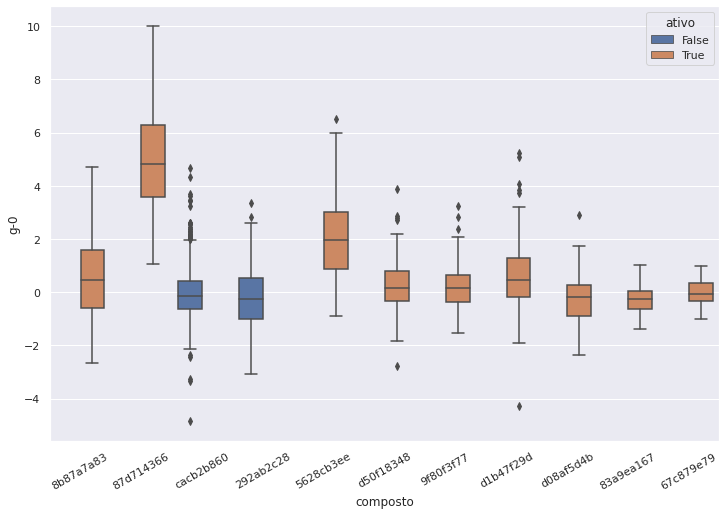

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

principais_compostos = dados['composto'].value_counts().index[:11]

plt.figure(figsize=(12, 8))
plt.xticks(rotation=30)
sns.boxplot(data=dados.query('composto in @principais_compostos'), y='g-0', x='composto', hue='ativo')

plt.show()